In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows',None) # to display all rows & dots will remove
pd.set_option('display.max_columns',None) # to display all rows & dots will remove

In [3]:
df = pd.read_excel (r'C:\Users\HP\Desktop\Evaluation Project Phase - Week 3 - (19-02)\Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df1 = pd.read_excel (r'C:\Users\HP\Desktop\Evaluation Project Phase - Week 3 - (19-02)\Test_set.xlsx')
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,15998
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,16612
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,25572
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,25778
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,16934


In [5]:
merge = [df, df1]
df3 = pd.concat(merge)

In [7]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          13354 non-null  object
 1   Date_of_Journey  13354 non-null  object
 2   Source           13354 non-null  object
 3   Destination      13354 non-null  object
 4   Route            13353 non-null  object
 5   Dep_Time         13354 non-null  object
 6   Arrival_Time     13354 non-null  object
 7   Duration         13354 non-null  object
 8   Total_Stops      13353 non-null  object
 9   Additional_Info  13354 non-null  object
 10  Price            13354 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1.2+ MB


In [8]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df3['Airline']=LE.fit_transform(df3['Airline'])
df3['Source']=LE.fit_transform(df3['Source'])
df3['Destination']=LE.fit_transform(df3['Destination'])
df3['Route']=LE.fit_transform(df3['Route'])
df3['Additional_Info']=LE.fit_transform(df3['Additional_Info'])
df3['Total_Stops']=LE.fit_transform(df3['Total_Stops'])

In [9]:
df3.drop({'Date_of_Journey','Dep_Time','Arrival_Time','Duration'},axis=1,inplace=True)

In [10]:
df3.describe()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price
count,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000
mean,3.977086,1.954096,1.435450,77.439494,1.451400,7.407743,11301.720009
std,2.363997,1.178607,1.473368,38.257148,1.804389,1.198393,6452.843082
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000
25%,3.000000,2.000000,0.000000,49.000000,0.000000,8.000000,6135.250000
50%,4.000000,2.000000,1.000000,76.000000,0.000000,8.000000,10262.000000
75%,4.000000,3.000000,2.000000,108.000000,4.000000,8.000000,14781.000000
max,11.000000,4.000000,5.000000,132.000000,5.000000,9.000000,79512.000000


In [11]:
df3.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
df3.corr()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price
Airline,1.000000,-0.018547,0.022130,0.020447,0.037978,-0.058533,-0.016809
Source,-0.018547,1.000000,-0.589710,0.410124,-0.223059,-0.022219,0.016235
Destination,0.022130,-0.589710,1.000000,-0.475881,0.336460,0.027398,-0.043160
Route,0.020447,0.410124,-0.475881,1.000000,-0.447204,0.036037,0.091704
Total_Stops,0.037978,-0.223059,0.336460,-0.447204,1.000000,0.162122,-0.337953
Additional_Info,-0.058533,-0.022219,0.027398,0.036037,0.162122,1.000000,-0.019336
Price,-0.016809,0.016235,-0.043160,0.091704,-0.337953,-0.019336,1.000000


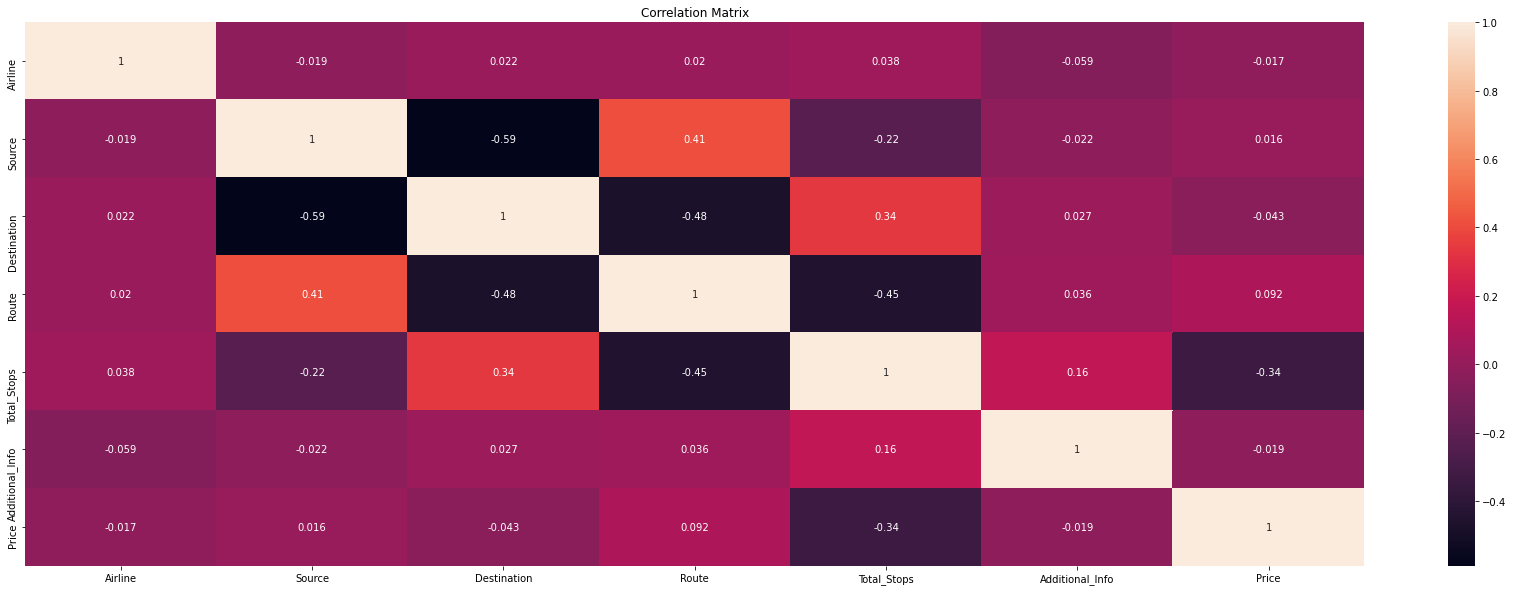

In [13]:
corr_mat=df3.corr()
# Size of the canvas
plt.figure(figsize=[30,10])
#Plot Correlation Matrix
sns.heatmap(corr_mat,annot=True) # annot represnts each value encoded in heatmap
plt.title('Correlation Matrix')
plt.show()

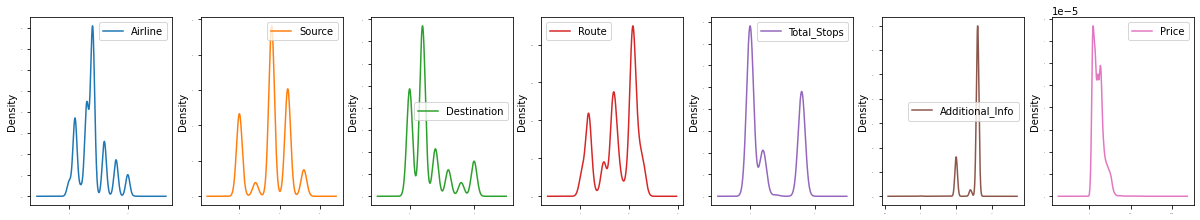

In [14]:
df3.plot(kind='density',subplots=True,layout=(5,10),sharex=False,fontsize=1,figsize=(30,20))
plt.show()

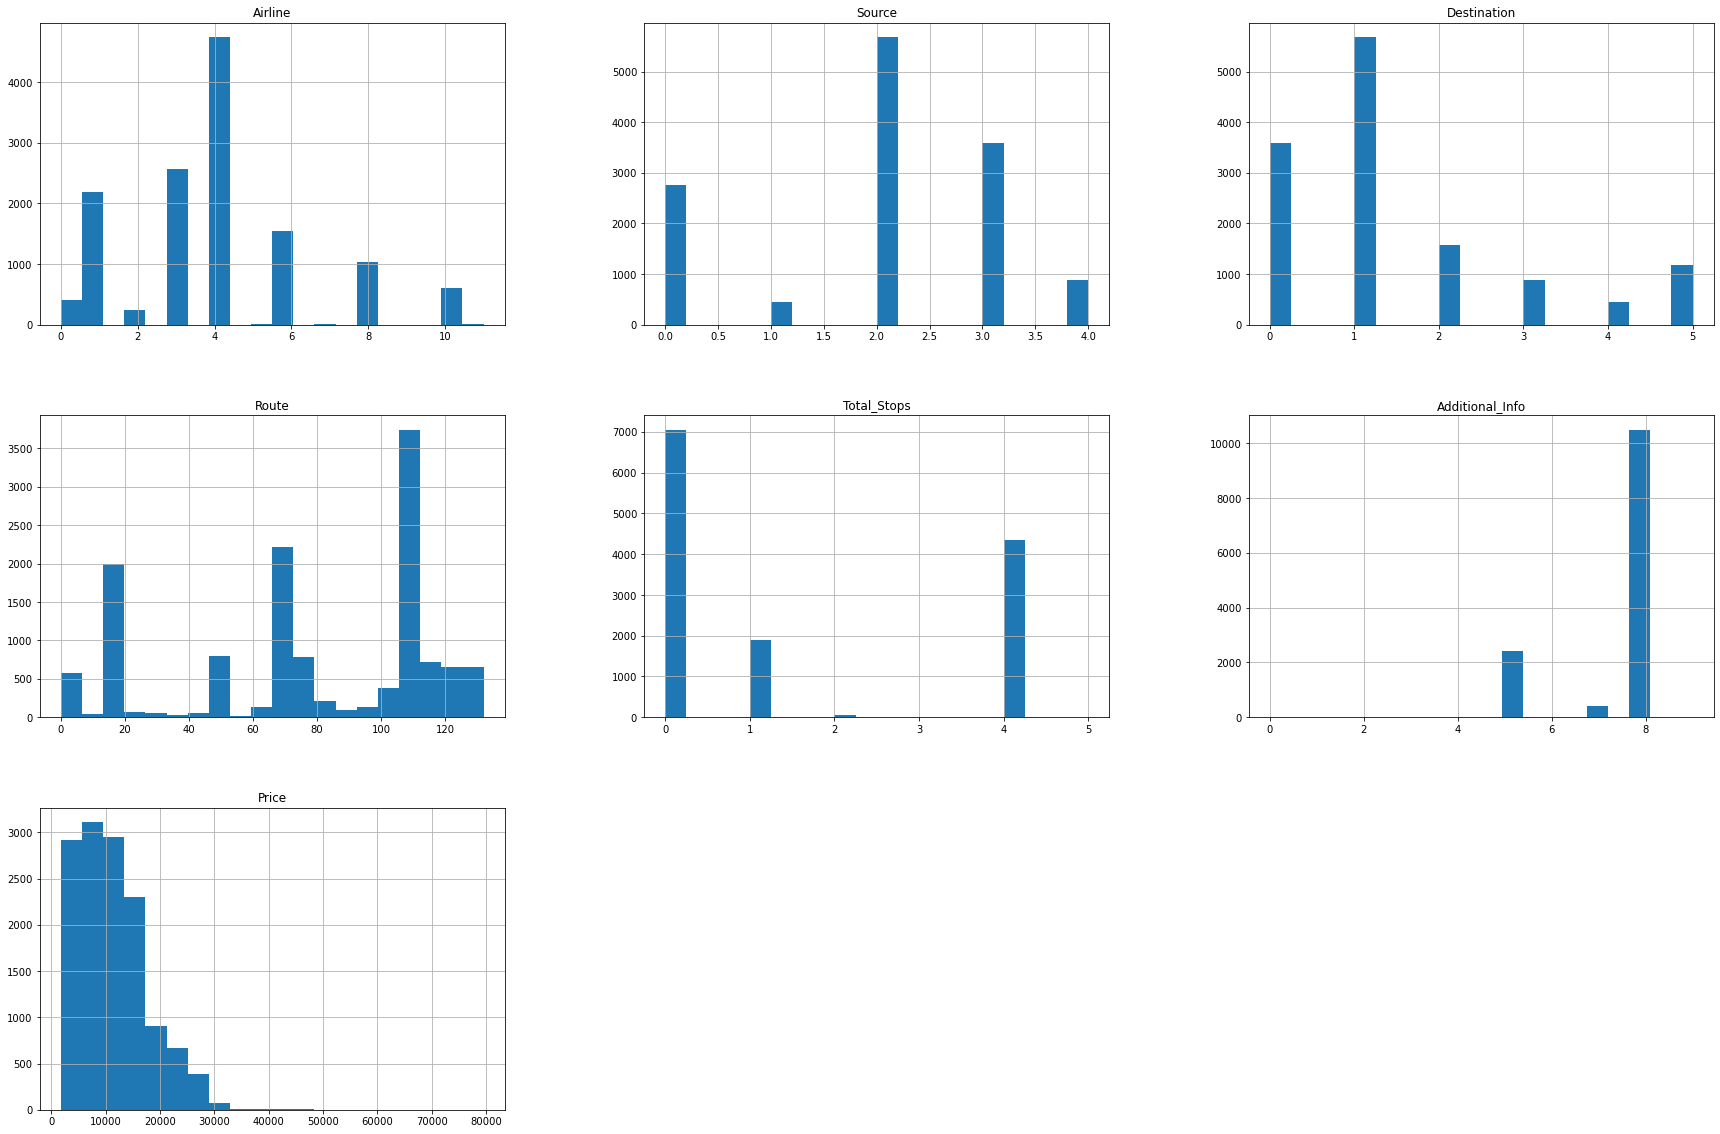

In [15]:
#plot histogram data vizualization
df3.hist(bins=20,figsize=(30,20))
#plot showing
plt.show()

In [16]:
# Checking Skweness
df3.skew().sort_values(ascending=False) # For descending

Destination        1.247893
Price              1.207480
Airline            0.720924
Total_Stops        0.639492
Source            -0.424151
Route             -0.521328
Additional_Info   -1.784752
dtype: float64

In [17]:
# Remove the Skweness of the data
from sklearn.preprocessing import power_transform
df3_new=power_transform(df3)
df3=pd.DataFrame(df3_new,columns=df3.columns)

In [18]:
df3.skew().sort_values(ascending=False) # For descending

Total_Stops        0.330227
Destination        0.041213
Airline           -0.017115
Price             -0.021370
Source            -0.238236
Route             -0.460922
Additional_Info   -1.403977
dtype: float64

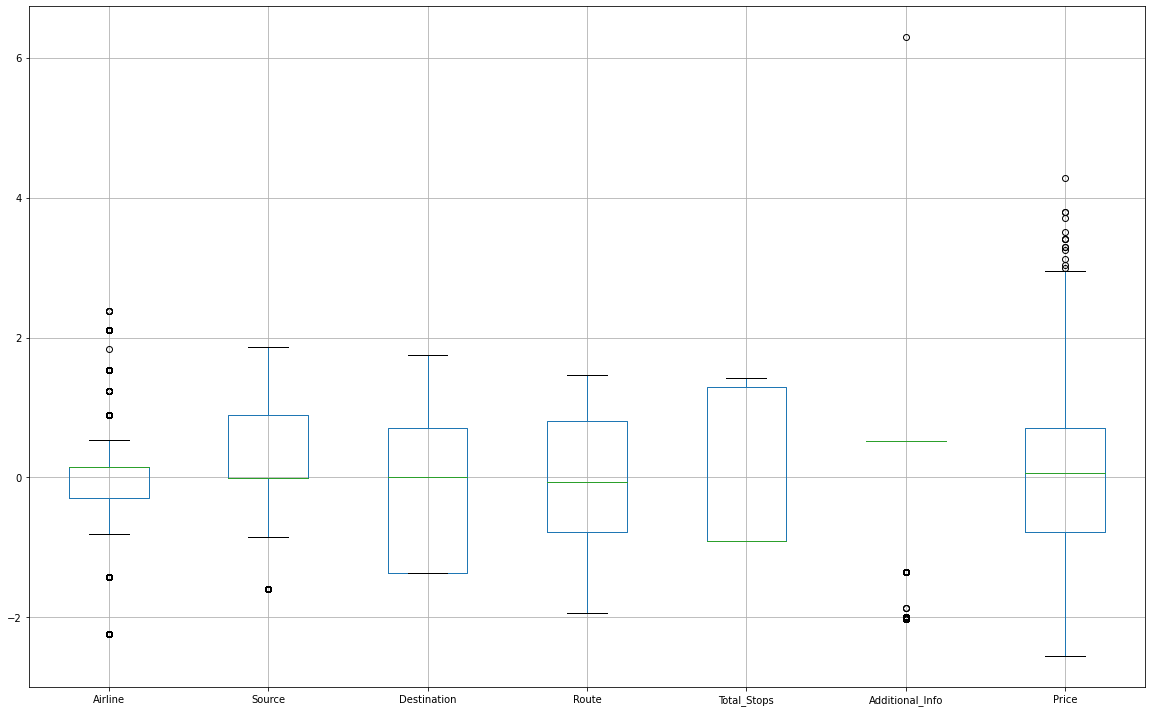

In [19]:
# Checking Outliers in data
# Plot boxplot
df3.boxplot(figsize=[20,15])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [20]:
from scipy.stats import zscore
z=np.abs(zscore(df3))
z.shape

(13354, 7)

In [21]:
threshold=2
print(np.where(z>2))

(array([   28,    29,    30, ..., 13291, 13299, 13302], dtype=int64), array([0, 0, 0, ..., 0, 0, 0], dtype=int64))


In [22]:
df3_new=df3[(z<2).all(axis=1)]
print(df3.shape)
print(df3_new.shape)

(13354, 7)
(12016, 7)


In [23]:
# % data loss
loss_percent=(13354-12016)/13354*100
print(loss_percent)

10.019469821776248


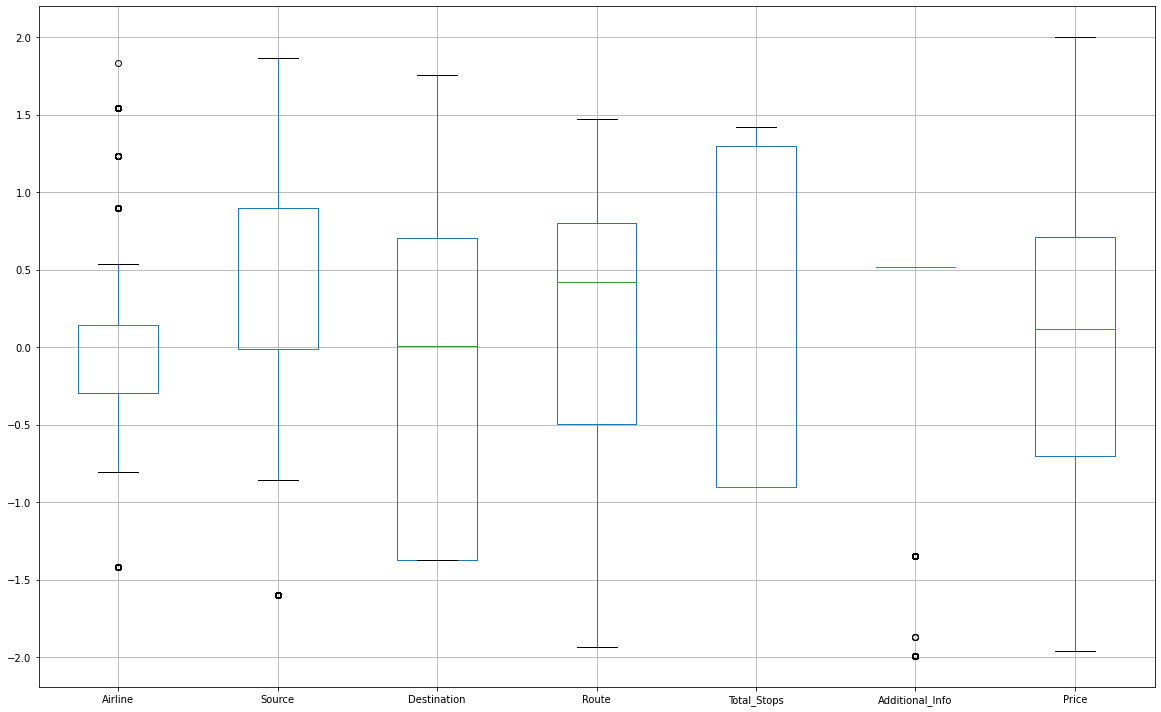

In [24]:
# Plot boxplot - To Check outliers 
df3_new.boxplot(figsize=[20,15])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [25]:
x=df3_new.drop(['Price'],axis=1)
y=df3_new['Price']

In [26]:
# Training process
# Min-max scaler
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [27]:
for i in range(0,1000):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
        lr.fit(x_train,y_train) # Fitting the data will train the model
        pred_train=lr.predict(x_train) # Predicting the data # Predicted traget variable
        pred_test=lr.predict(x_test)
        print(f'At Random State {i}, the training accuracy is :- {r2_score(y_train,pred_train)}')
        print(f'At Random State {i}, the training accuracy is :- {r2_score(y_test,pred_test)}')
        print("\n")

At Random State 0, the training accuracy is :- 0.15147633594304055
At Random State 0, the training accuracy is :- 0.15321131863496962


At Random State 1, the training accuracy is :- 0.15768855196883413
At Random State 1, the training accuracy is :- 0.12794792187116255


At Random State 2, the training accuracy is :- 0.15575944451657764
At Random State 2, the training accuracy is :- 0.13491553810266832


At Random State 3, the training accuracy is :- 0.1515835136983017
At Random State 3, the training accuracy is :- 0.15268911409485897


At Random State 4, the training accuracy is :- 0.15362060213717166
At Random State 4, the training accuracy is :- 0.14438742326096143


At Random State 5, the training accuracy is :- 0.15206740749501635
At Random State 5, the training accuracy is :- 0.1506427885893853


At Random State 6, the training accuracy is :- 0.14355463359190312
At Random State 6, the training accuracy is :- 0.18218569439530508


At Random State 7, the training accuracy is :- 0.1

In [28]:
# Cross Validation
Train_accuracy = r2_score(y_train,pred_train)
Test_accuracy = r2_score(y_test,pred_test)
from sklearn.model_selection import cross_val_score
for i in range(2,8):
    cv_score=cross_val_score(lr,x,y,cv=4)
    cv_mean=cv_score.mean()
    print(f'At cross fold {i} the cv score is  {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}')
    print('\n')

At cross fold 2 the cv score is  -0.5121873137617378 and accuracy score for training is 0.14947684881510392 and accuracy score for testing is 0.1612340869705846


At cross fold 3 the cv score is  -0.5121873137617378 and accuracy score for training is 0.14947684881510392 and accuracy score for testing is 0.1612340869705846


At cross fold 4 the cv score is  -0.5121873137617378 and accuracy score for training is 0.14947684881510392 and accuracy score for testing is 0.1612340869705846


At cross fold 5 the cv score is  -0.5121873137617378 and accuracy score for training is 0.14947684881510392 and accuracy score for testing is 0.1612340869705846


At cross fold 6 the cv score is  -0.5121873137617378 and accuracy score for training is 0.14947684881510392 and accuracy score for testing is 0.1612340869705846


At cross fold 7 the cv score is  -0.5121873137617378 and accuracy score for training is 0.14947684881510392 and accuracy score for testing is 0.1612340869705846




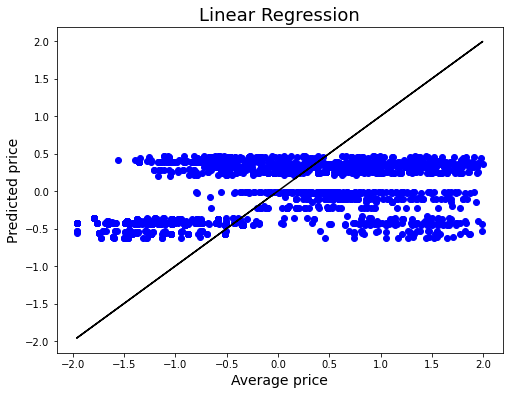

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='blue')
plt.plot(y_test,y_test,color='black')
plt.xlabel('Average price', fontsize=14)
plt.ylabel('Predicted price', fontsize=14)
plt.title('Linear Regression', fontsize=18)
plt.show()

In [30]:
# Regularization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,20))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [31]:
ls=Lasso(alpha=0.001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.16119323283984743

In [38]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

-205.57364758664076

In [39]:
# Ensemble Technique
from sklearn.ensemble import AdaBoostRegressor
AD = AdaBoostRegressor()
AD.fit(x_train,y_train)
AD.score(x_test,y_test)

0.3004305356319634

In [40]:
# Conclusion:
Data=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_1=pd.DataFrame({'original':Data,'predicted':predicted},index=range(len(Data)))
df_1

,original,predicted
0,-0.036782,0.244648
1,-0.339572,0.244931
2,-0.525644,0.323750
3,0.756453,-0.106842
4,0.754508,-0.018308
5,0.698346,-0.106969
6,-1.490390,-0.422661
7,-0.693204,0.411254
8,0.554130,-0.017294
9,-1.795028,-0.358747


In [41]:
# Model Saving
import pickle
filename = 'Flight Price Prediction.pkl'
pickle.dump(lr,open(filename,'wb'))

# Thanks...!!!